In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load the given dataset

In [2]:
dataset = pd.read_csv('/content/Python_Linear_Regression_Project.csv')
experience_mapping = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,

}
dataset['experience'] = dataset['experience'].map(experience_mapping)

# Separate feature data from target data

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[nan  8.  9.]
 [nan  8.  6.]
 [ 5.  6.  7.]
 [ 2. 10. 10.]
 [ 7.  9.  6.]
 [ 3.  7. 10.]
 [10. nan  7.]
 [11.  7.  8.]]


In [5]:
print(y)

[50000 45000 60000 65000 70000 62000 72000 80000]


In [6]:
null_counts = dataset.isnull().sum()
print(null_counts)


experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64


# Replace the Null values of the column test score with value 0

In [7]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imputer.fit(X[:, 0:1])
X[:, 0:1] = imputer.transform(X[:, 0:1])


In [8]:
print(X[:, 0:1])

[[ 0.]
 [ 0.]
 [ 5.]
 [ 2.]
 [ 7.]
 [ 3.]
 [10.]
 [11.]]


# Replace the Null values of the column test score with mean value

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean' ,)
imputer.fit(X[:, 1:2])
X[:, 1:2] = imputer.transform(X[:, 1:2])

In [10]:
print(X[:, 1:2])

[[ 8.        ]
 [ 8.        ]
 [ 6.        ]
 [10.        ]
 [ 9.        ]
 [ 7.        ]
 [ 7.85714286]
 [ 7.        ]]


# Display a scatter plot between experience and Salary

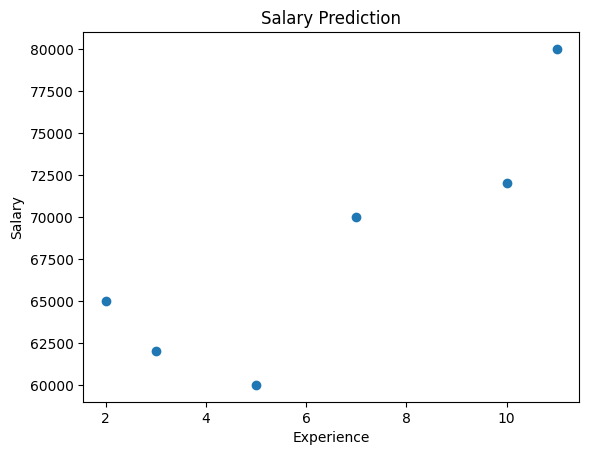

In [11]:
plt.scatter(dataset['experience'] , dataset['salary($)']);
plt.title('Salary Prediction')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

# Display a scatter plot between test and Salary

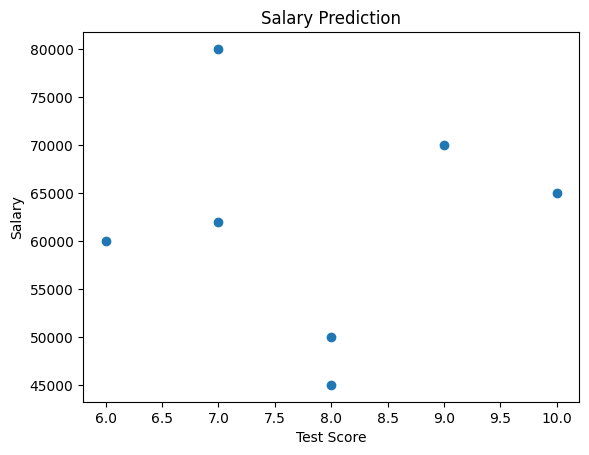

In [12]:
plt.scatter(dataset['test_score(out of 10)'] , dataset['salary($)']);
plt.title('Salary Prediction')
plt.xlabel('Test Score')
plt.ylabel('Salary')
plt.show()

# Display a scatter plot between Interview and Salary

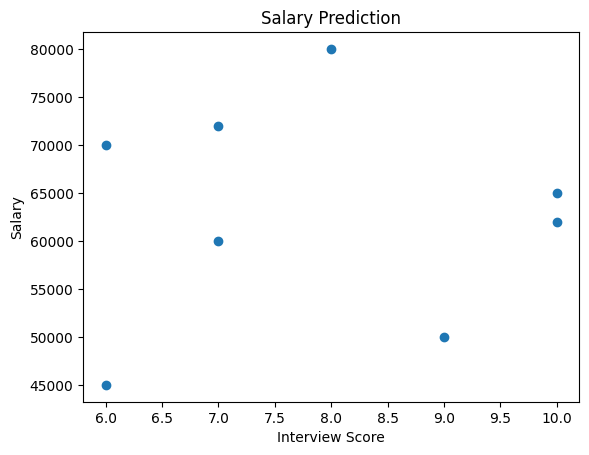

In [13]:
plt.scatter(dataset['interview_score(out of 10)'] , dataset['salary($)']);
plt.title('Salary Prediction')
plt.xlabel('Interview Score')
plt.ylabel('Salary')
plt.show()

# Display bar plot for experience

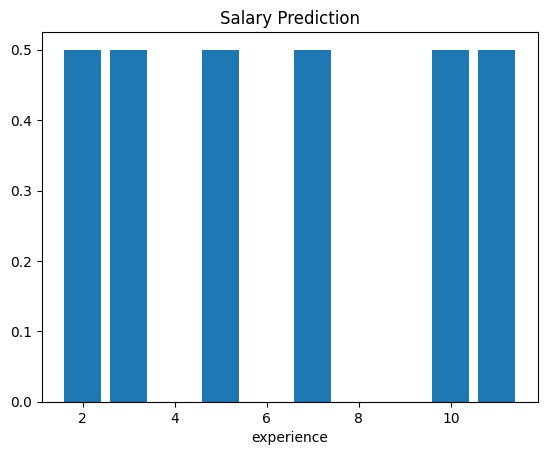

In [14]:
plt.bar(dataset['experience'] , height = 0.5);
plt.title('Salary Prediction')
plt.xlabel('experience')
plt.show()

# Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1)

# Create a Linear regression model between Features and target data

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

# Extract slope and intercept value from the model

In [18]:
regressor.coef_

array([2639.68310613, 2747.24145314, 1987.3575524 ])

In [19]:
regressor.intercept_

12493.255299407581

# Display Mean Squared Error
# Display Mean Absolute Error
# Display Root mean Squared error
# Display R2 score

In [20]:
from sklearn.metrics import mean_squared_error,r2_score , mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test , y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

2883.129921728168


In [21]:
mse1 = np.sqrt(mse)
print(mse1)

3077.965705286236


In [22]:
print('Slope:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Root mean squared error: ', mse1)
print('R2 score: ', r2)

Slope: [2639.68310613 2747.24145314 1987.3575524 ]
Intercept: 12493.255299407581
Root mean squared error:  3077.965705286236
R2 score:  0.9539108886776952
